Logistic regression

## What IS NOT a logistic regression?

Logistic regression is not:

- a fit of a sigmoid curve to a set of points $(x_1, y_1), ..., (x_n, y_n)$
- a classification method - although it is often used for this purpose

## What IS a logistic regression?

Logistic regression is a regression model that attempts to model a probability of a binary outcome (0 or 1), assuming that log-odds of this probability is a linear combination of one or more inputs. Odds ratio is ratio between probability of outcome happening (1) and the probability of the outcome not happening (0).

The goal behind logistic regression is to model the input(s) affecting the probability of outcome happening. One way to do this is to find a mathematical curve that 

In [1]:
import numpy as np
import pandas as pd
import plotnine as p9
from scipy.stats import uniform, bernoulli

np.random.seed(1)

In [7]:
def logistic(x, k, x0):
    return 1 / (1 + np.exp(-k*(x - x0)))

Create test data

In [2]:
def calculate_px(x0, k):
	x = np.linspace(0, 5, 100)
	px_df = pd.DataFrame({
		'x': x,
		'y': logistic(x, x0, k)
	})
	return px_df



def create_test_data(n0s, n1s, k, x0):
	df = pd.DataFrame({
		'x': np.concatenate((
			uniform.rvs(loc=0, scale=3, size=n0s),
			uniform.rvs(loc=2, scale=3, size=n1s),
		)),
		# 'x': uniform.rvs(loc=0, scale=5, size=n0s+n1s),
		'y_true': np.concatenate((
			[0] * n0s,
			[1] * n1s,
		))
	})
	df['px_model'] = logistic(df['x'], k, x0)
	df['y'] = bernoulli.rvs(df['px_model'])
	return df

df = create_test_data(20, 20, 2.5, 3)
df

,x,y_true,px_model,y
0,1.251066,0,0.012464,1
1,2.160973,0,0.109334,0
2,0.000343,0,0.000553,0
3,0.906998,0,0.005312,0
4,0.440268,0,0.001660,0
5,0.277016,0,0.001104,0
6,0.558781,0,0.002231,0
7,1.036682,0,0.007331,0
8,1.190302,0,0.010727,0
9,1.616450,0,0.030505,0


In [3]:

def calculate_px(k, x0):
	x = np.linspace(0, 5, 100)
	px_df = pd.DataFrame({
		'x': x,
		'y': logistic(x, k, x0)
	})
	return px_df

px_df = calculate_px(2.5, 3)

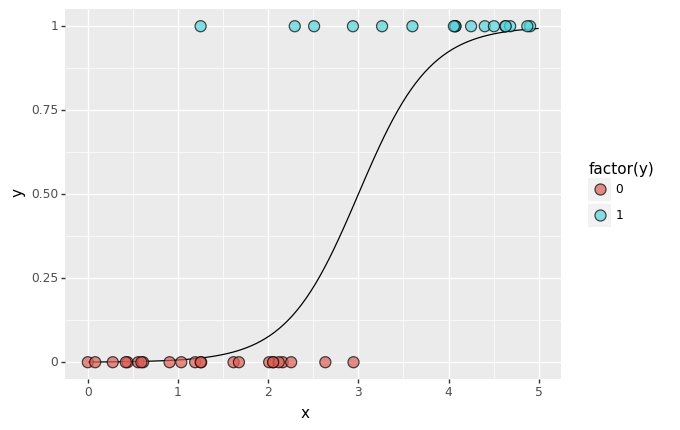

<ggplot: (281646669)>

In [4]:
def plot_data_and_px(df, px_df):
	return (
		p9.ggplot(df, p9.aes('x', 'y'))
		+ p9.geom_line(data=px_df)
		+ p9.geom_point(size=4, shape='o', alpha=0.7, mapping=p9.aes(fill='factor(y)'))
	)

plot_data_and_px(df, px_df)

Define probability of y = 1:

$$
p(x) = \frac{1}{1 + e^{\beta_1 x + \beta_0}}
$$ 

We can fit the points to log-probabilities. For y = 1 we are fitting the points to:

$$
-\log p(x) = -\log\frac{1}{1 + e^{\beta_1 x + \beta_0}} = \log\left( 1 + e^{\beta_1 x + \beta_0}\right)
$$

And for y = 0, we are fitting the points to:

$$
\begin{align}
 -\log\left[1 - p(x)\right] & = -\log\left(1 - \frac{1}{1 + e^{\beta_1 x + \beta_0}}\right) \\
 & = -\log\left(
    \frac{1 + e^{\beta_1 x + \beta_0}}{1 + e^{\beta_1 x + \beta_0}} - 
    \frac{1}{1 + e^{\beta_1 x + \beta_0}}
    \right) \\
 & = -\log\frac{e^{\beta_1 x + \beta_0}}{1 + e^{\beta_1 x + \beta_0}} \\
 & = -\log\frac{1}{1 + e^{-(\beta_1 x + \beta_0)}} \\
 & = \log\left(1 + e^{-(\beta_1 x + \beta_0)}\right)
\end{align}
$$

In [5]:
def log_loss(p_x, y):
    return -y * np.log(p_x) - (1 - y) * np.log(1 - p_x)

Total log-loss:  11.259706391870935


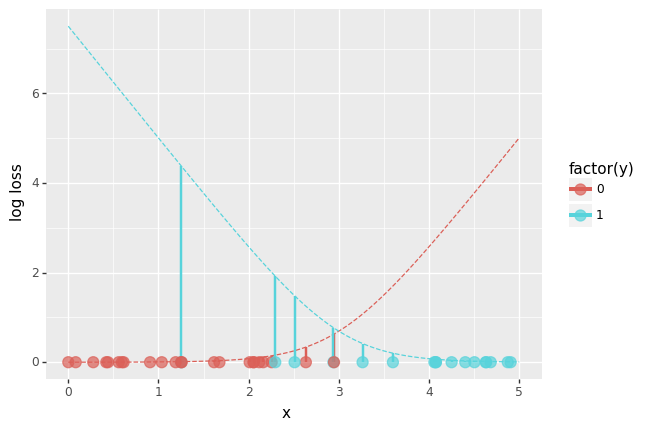

<ggplot: (329484192)>

In [6]:
# steepness = 3
# x_offset = 2.5

# beta1 = 1
# beta0 = 2.5

def plot_logistic_fit(df, k, x0):
	x = np.linspace(0, 5, 100)
	px = logistic(x, k, x0)

	df['px'] = logistic(df['x'], k, x0)
	df['log_loss'] = log_loss(df['px'], df['y'])

	print('Total log-loss: ', np.sum(df['log_loss']))

	log_loss_df = pd.DataFrame({
		'x': np.concatenate((x, x)),
		'y': np.concatenate((
			[0] * len(x),
			[1] * len(x)
		)),
		'log_loss': np.concatenate((
			log_loss(px, y=0),
			log_loss(px, y=1)
		)),
		# 'log_loss_0': log_loss(px, y=0),
		# 'log_loss_1': log_loss(px, y=1),
	})

	return (
		ggplot(df, aes('x', 0, color='factor(y)', fill='factor(y)'))
		+ geom_line(data=log_loss_df, mapping=aes('x', 'log_loss'), linetype='dashed')
		+ geom_linerange(mapping=aes(ymin=0, ymax='log_loss'), size=1)
		+ geom_point(size=4, shape='o', alpha=0.7)
		+ scale_y_continuous(name='log loss')
		# + ylim(0, 5)
	)

plot_logistic_fit(df, 2.5, 3)